In [ ]:
import pandas as pd

In [ ]:
dataURL = 'https://raw.githubusercontent.com/nvamsimohan/DallasDSA/main/PCCI%20Cases%20Readmit30%20Data.csv'
df = pd.read_csv(dataURL)
df

,Admit_Week,Admit_Month,Gender,Marital_Status,Insurance_Provider,Tobacco_User,Depression,ICU,Drug_Abuse,Mood_Disorder,...,Temperature,Pat_Pain_Score,ER_Visits,IP_Visits,Chronic_Conditions,Glucose,Condition,Care_Plan_Following_Discharge,Cost_Of_Initial_Stay,Readmit30
0,Sunday,Jan,F,Married,Medicare,Never,No,No,No,Yes,...,98.0,0,5,0,8,113,Pneumonia,Skilled Nursing Facility,8004.80,1
1,Sunday,Jan,M,Married,Medicare,Quit,No,No,No,No,...,98.0,2,0,0,7,109,Pneumonia,Telehealth,3205.12,0
2,Sunday,Jan,F,Single,Medicare,Never,No,No,No,No,...,98.0,0,0,0,6,98,Heart_Failure,Skilled Nursing Facility,15694.26,0
3,Sunday,Jan,M,Married,Medicare,Quit,No,No,No,No,...,99.0,0,3,0,7,135,Heart_Failure,Telehealth,10014.29,0
4,Sunday,Jan,F,Single,Commercial,Never,No,No,No,No,...,98.0,0,0,0,2,126,Heart_Failure,Telehealth,8798.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12975,Saturday,Dec,M,Married,Medicare,Quit,No,Yes,No,No,...,97.0,3,2,0,4,96,Heart_Failure,Discharged to Home,5359.67,0
12976,Saturday,Dec,F,Single,Medicaid,Quit,No,No,No,No,...,99.0,4,3,0,7,157,Pneumonia,Discharged to Home,5536.30,0
12977,Saturday,Dec,M,Single,Medicare,Quit,No,No,No,No,...,97.0,0,1,0,5,203,Pneumonia,Discharged to Home,5427.93,0
12978,Saturday,Dec,M,Married,Medicare,Quit,No,No,No,No,...,99.0,2,3,0,5,138,Pneumonia,Hospice,3112.01,0


<Axes: >

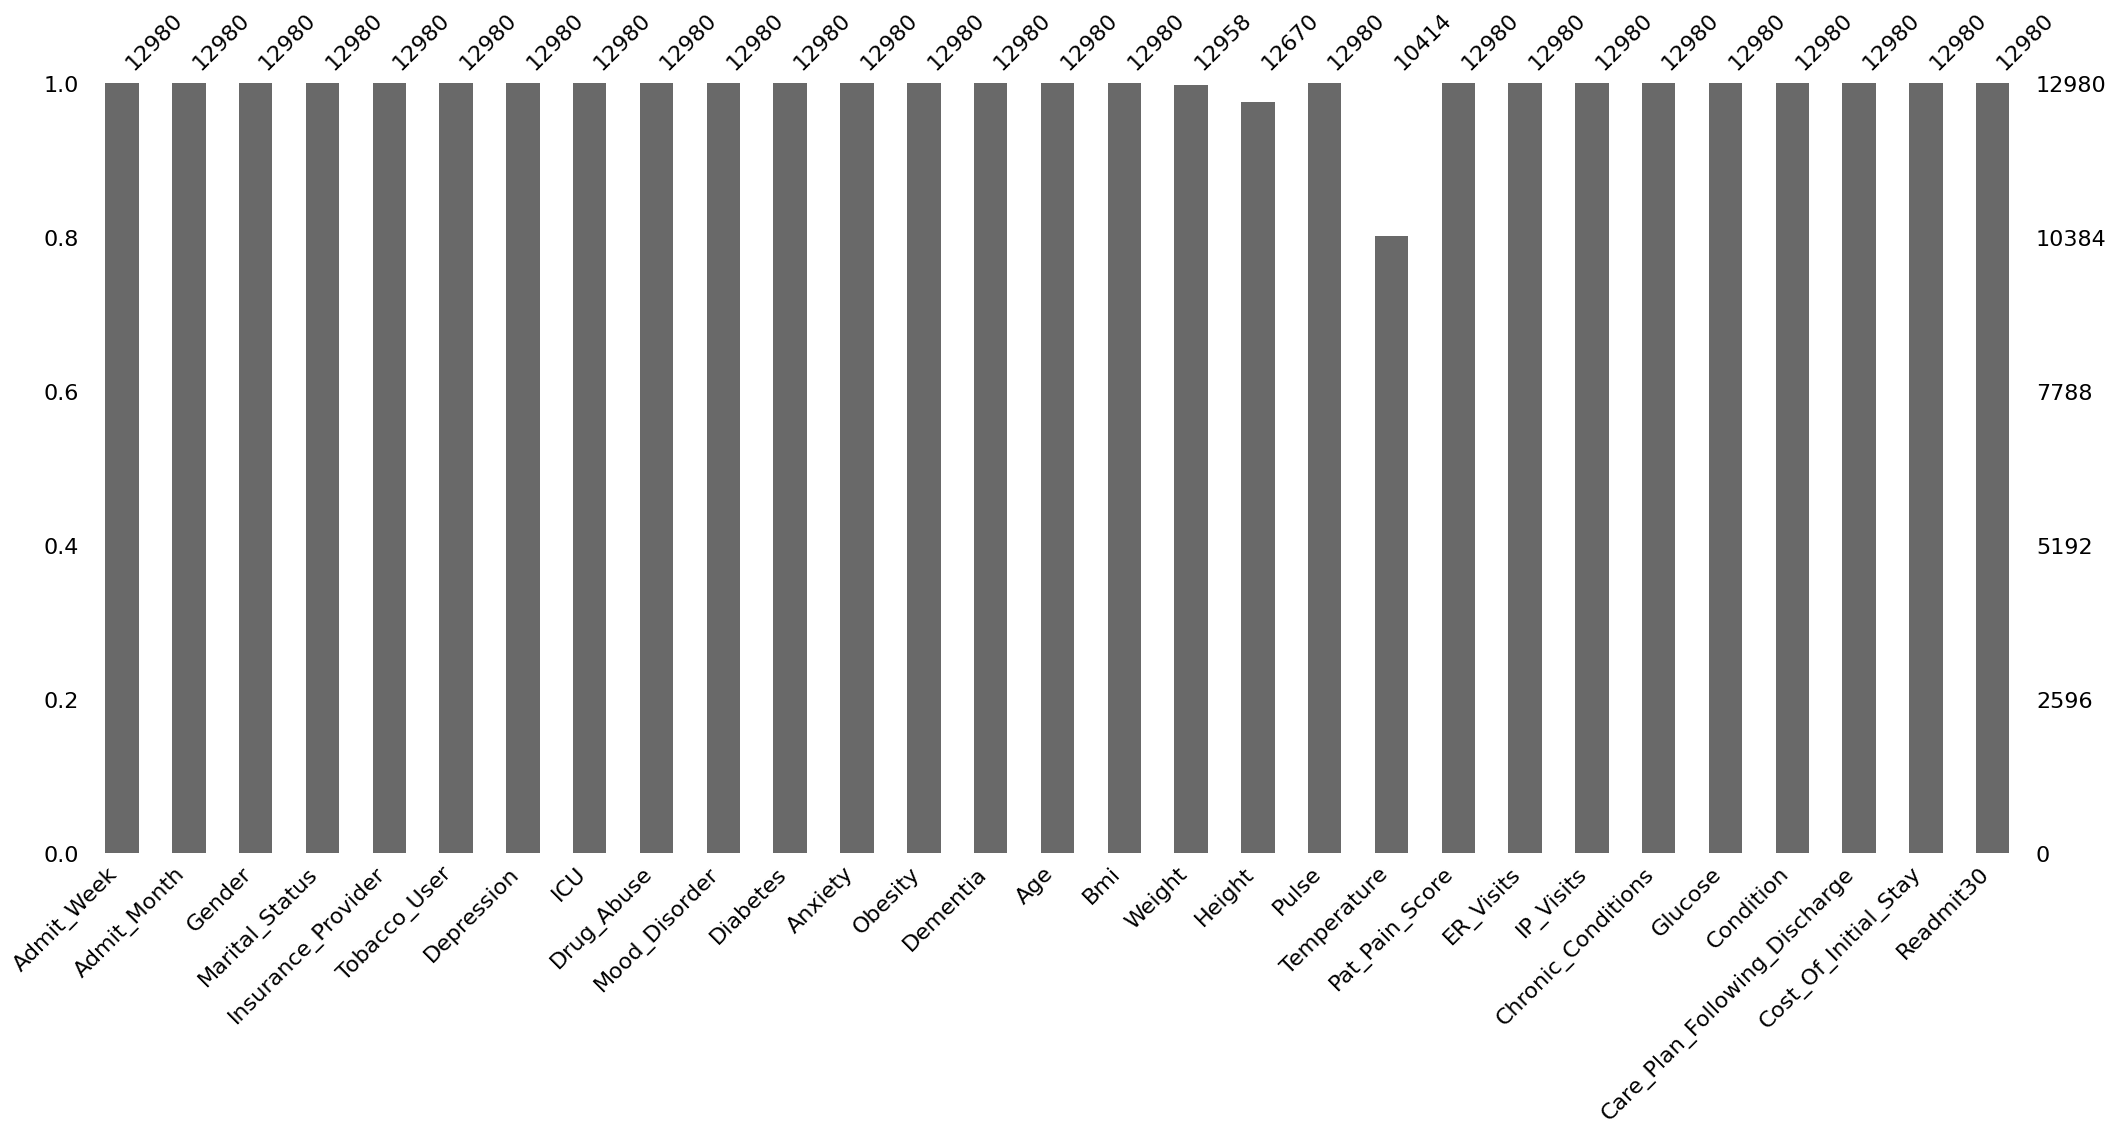

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
df.drop('Temperature',axis=1,inplace=True)

In [ ]:
df.columns


Index(['Admit_Week', 'Admit_Month', 'Gender', 'Marital_Status',
       'Insurance_Provider', 'Tobacco_User', 'Depression', 'ICU', 'Drug_Abuse',
       'Mood_Disorder', 'Diabetes', 'Anxiety', 'Obesity', 'Dementia', 'Age',
       'Bmi', 'Weight', 'Height', 'Pulse', 'Pat_Pain_Score', 'ER_Visits',
       'IP_Visits', 'Chronic_Conditions', 'Glucose', 'Condition',
       'Care_Plan_Following_Discharge', 'Cost_Of_Initial_Stay', 'Readmit30'],
      dtype='object')

In [ ]:
noiseVars = ['Admit_Week','Admit_Month','Marital_Status','Insurance_Provider','Height']
catVars = ['Gender','Tobacco_User', 'Depression', 'ICU', 'Drug_Abuse',
       'Mood_Disorder', 'Diabetes', 'Anxiety', 'Obesity', 'Dementia','Condition','Care_Plan_Following_Discharge']
numVars = ['Bmi', 'Weight','Pulse', 'Pat_Pain_Score', 'ER_Visits',
       'IP_Visits', 'Chronic_Conditions', 'Glucose',]
y = 'Readmit30'

In [ ]:
!pip install -U --pre Pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
classification_Model = setup(data=df, target= y, numeric_features=numVars,categorical_features=catVars,ignore_features=noiseVars)

,Description,Value
0,Session id,6781
1,Target,Readmit30
2,Target type,Binary
3,Original data shape,"(12980, 28)"
4,Transformed data shape,"(12980, 32)"
5,Transformed train set shape,"(9086, 32)"
6,Transformed test set shape,"(3894, 32)"
7,Ignore features,5
8,Numeric features,8
9,Categorical features,12


In [ ]:
compare_models(budget_time = 150)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8356,0.6797,0.1659,0.8886,0.2781,0.2324,0.3393,2.0030
et,Extra Trees Classifier,0.8338,0.6698,0.1825,0.7925,0.2960,0.2422,0.3276,1.6460
lightgbm,Light Gradient Boosting Machine,0.8210,0.6807,0.1322,0.6788,0.2207,0.1689,0.2430,1.1970
xgboost,Extreme Gradient Boosting,0.8171,0.6663,0.1923,0.5699,0.2869,0.2111,0.2524,0.5440
gbc,Gradient Boosting Classifier,0.8112,0.6776,0.0543,0.6026,0.0995,0.0701,0.1380,2.4850
dummy,Dummy Classifier,0.8076,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2840
ridge,Ridge Classifier,0.8073,0.6605,0.0132,0.4383,0.0254,0.0152,0.0479,0.3480
lr,Logistic Regression,0.8064,0.6313,0.0212,0.4439,0.0401,0.0228,0.0595,2.0010
ada,Ada Boost Classifier,0.8060,0.6586,0.0429,0.4530,0.0778,0.0466,0.0893,0.8510
lda,Linear Discriminant Analysis,0.8056,0.6605,0.0481,0.4657,0.0866,0.0517,0.0966,0.5800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=6781, verbose=0,
                       warm_start=False)

In [ ]:
best_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8493,0.7282,0.2286,0.9524,0.3687,0.3178,0.4242
1,0.8251,0.6579,0.1086,0.8636,0.1929,0.1566,0.2681
2,0.8306,0.6595,0.1429,0.8621,0.2451,0.2014,0.3083
3,0.8438,0.7097,0.2000,0.9459,0.3302,0.2819,0.3936
4,0.8350,0.6700,0.1829,0.8205,0.2991,0.2462,0.3372
5,0.8295,0.6710,0.1486,0.8125,0.2512,0.2038,0.3004
6,0.8381,0.6752,0.1609,0.9655,0.2759,0.2339,0.3571
7,0.8425,0.6807,0.2011,0.8974,0.3286,0.2780,0.3799
8,0.8337,0.6702,0.1657,0.8529,0.2775,0.2292,0.3301


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

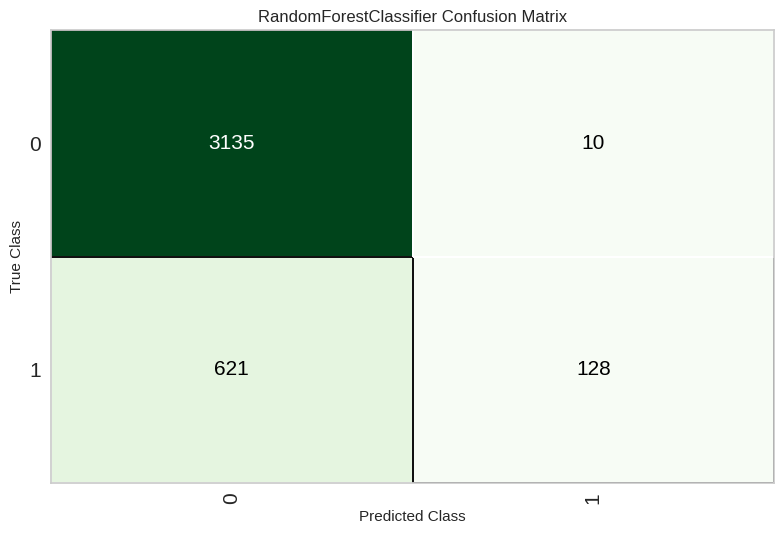

In [ ]:
plot_model(best_model,plot='confusion_matrix')

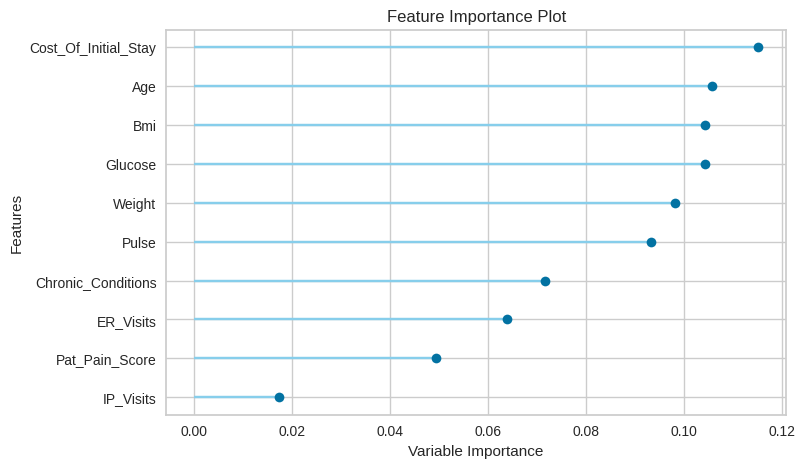

In [ ]:
plot_model(best_model,plot='feature')

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
client_data = pd.read_csv('https://raw.githubusercontent.com/nvamsimohan/DallasDSA/main/PCCI%20-%20Client%20Data%20File.csv')
reAdmitStatusPrediction = predict_model(best_model,data=client_data)
reAdmitStatusPrediction.to_csv('reAdmitStatusPrediction10-18-2024.csv')